#14757 Lecture 16

## Iris data set

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

file_path = 'http://www.andrew.cmu.edu/user/dvaroday/14757/data/lecture/iris.csv'
df = pd.read_csv(file_path, header=None, names=['sepal length','sepal width','petal length','petal width', 'species'])
display(df)


,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


### Scatter plot matrix

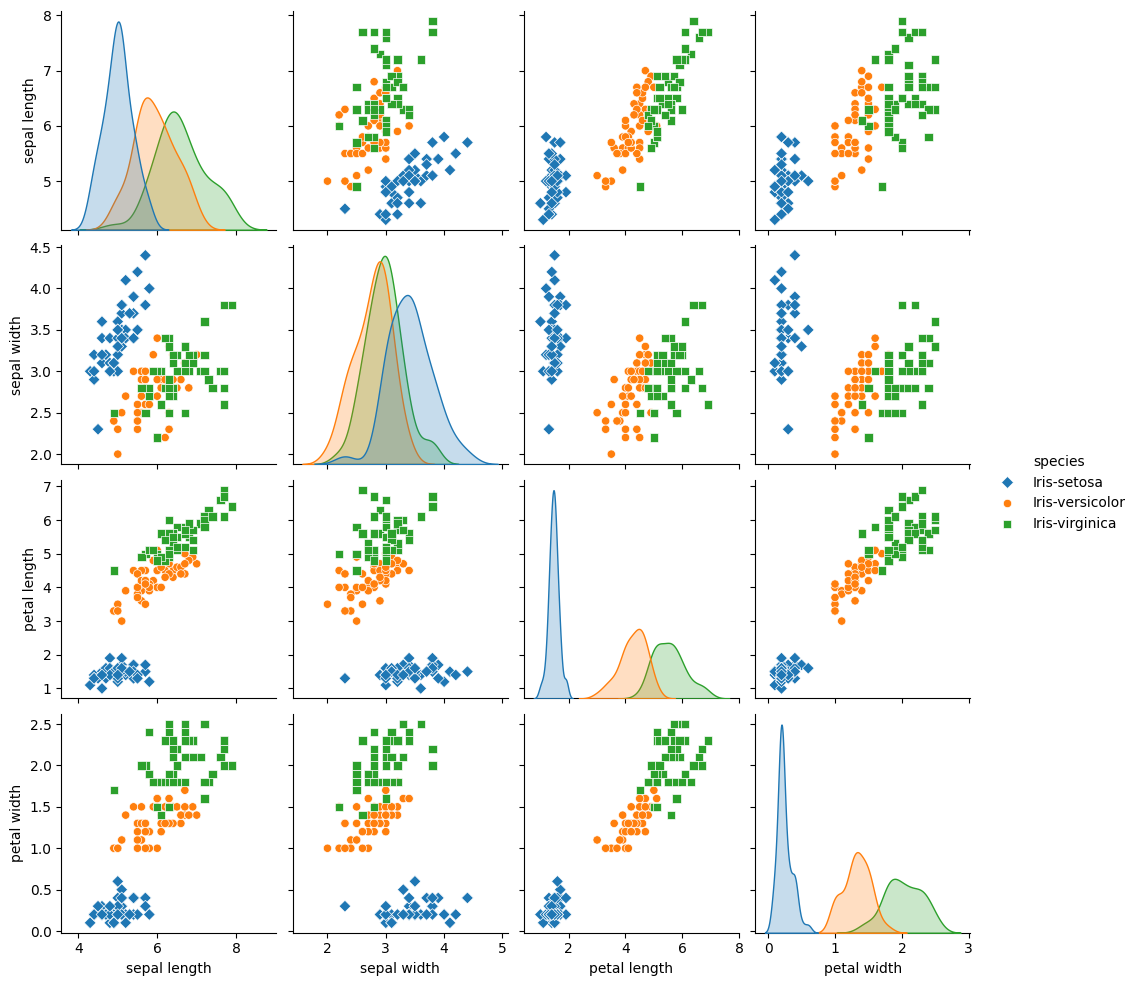

In [ ]:
sns.pairplot(df, hue="species", markers=['D', 'o', 's'])

### Covariance matrix and its eigenvalues

In [ ]:
from sklearn.preprocessing import StandardScaler
# Separating out the features
X = df.loc[:, ['sepal length', 'sepal width', 'petal length', 'petal width']].values
# Standardizing the features
X = StandardScaler().fit_transform(X)
# Covariance matrix
cov_mat = np.cov(X.T, ddof=0)
print(cov_mat)

[[ 1.         -0.10936925  0.87175416  0.81795363]
 [-0.10936925  1.         -0.4205161  -0.35654409]
 [ 0.87175416 -0.4205161   1.          0.9627571 ]
 [ 0.81795363 -0.35654409  0.9627571   1.        ]]


[2.91081808 0.92122093 0.14735328 0.02060771]


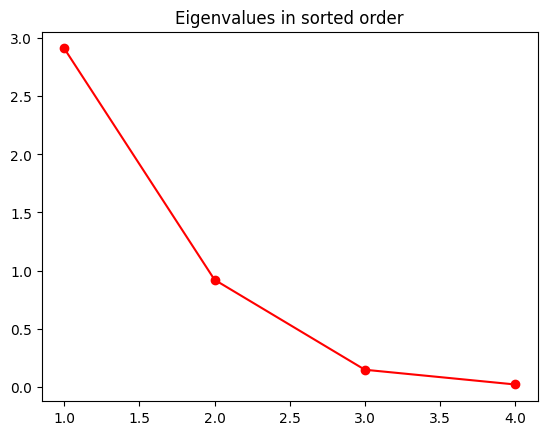

In [ ]:
# Obtain eigenvalues and eigenvectors
eigenvals, eigenvecs = np.linalg.eig(cov_mat)
# Sort eigenvalues and eigenvectors in order of decreasing eigenvalue
idx = np.argsort(eigenvals)[::-1]
eigenvals = eigenvals[idx]
eigenvecs = eigenvecs[:,idx]
# Plot eigenvalues in decreasing order
plt.plot(np.arange(1,5), eigenvals, 'ro-')
plt.title('Eigenvalues in sorted order')
print(eigenvals)

### Projection on to the first two principal components

In [ ]:
'''
In PCA, the goal is to identify the eigenvectors (directions) that capture the most variance (eigenvalues) and use them to transform the data into a new space where the dimensions (principal components) are ordered by the amount of variance they explain
'''
from sklearn.decomposition import PCA

X = df.loc[:, ['sepal length', 'sepal width', 'petal length', 'petal width']].values
X = StandardScaler().fit_transform(X)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
df_pca = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
display(df_pca.head())

,principal component 1,principal component 2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


In [ ]:
df_joined = pd.concat([df_pca, df.species], axis = 1)
display(df_joined.head())

,principal component 1,principal component 2,species
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


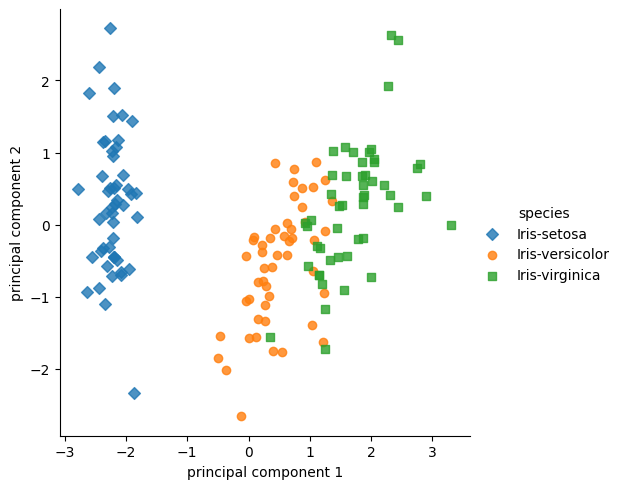

In [ ]:
sns.lmplot(x='principal component 1', y='principal component 2', data=df_joined, fit_reg=False, hue="species", markers=['D','o','s'])

### Projection on to the first two principal components **without standardization** (for comparison)

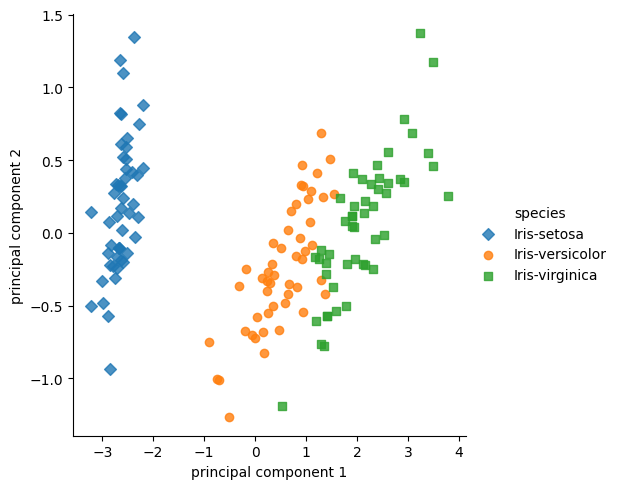

In [ ]:
X = df.loc[:, ['sepal length', 'sepal width', 'petal length', 'petal width']].values
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
df_pca = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
df_joined = pd.concat([df_pca, df.species], axis = 1)
sns.lmplot(x='principal component 1', y='principal component 2', data=df_joined, fit_reg=False, hue="species", markers=['D','o','s'])

## Bodyfat data set

In [ ]:
file_path = 'http://www.andrew.cmu.edu/user/dvaroday/14757/data/lecture/BodyFat.xls'
df = pd.read_excel(file_path, usecols= range(1,17))
display(df)

,BODYFAT,DENSITY,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,12.6,1.0708,23,154.25,67.75,23.7,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,6.9,1.0853,22,173.25,72.25,23.4,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,24.6,1.0414,22,154.00,66.25,24.7,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,10.9,1.0751,26,184.75,72.25,24.9,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,27.8,1.0340,24,184.25,71.25,25.6,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,11.5,1.0736,70,134.25,67.00,21.1,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5
248,32.3,1.0236,72,201.00,69.75,29.1,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1
249,28.3,1.0328,72,186.75,66.00,30.2,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0
250,25.3,1.0399,72,190.75,70.50,27.0,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8


### Principal components analysis

In [ ]:
X = StandardScaler().fit_transform(df)
pca = PCA(n_components=3)
principal_components = pca.fit_transform(X)
df_principal = pd.DataFrame(data = principal_components, columns = ['pc1', 'pc2', 'pc3'])

import plotly.express as px
fig = px.scatter_3d(df_principal, x='pc1', y='pc2', z='pc3')
fig.show()

### Multidimensional scaling

In [ ]:
from sklearn.manifold import MDS
mds =  MDS(n_components=3, random_state=0, normalized_stress='auto')
coordinates = mds.fit_transform(X)
df_mds = pd.DataFrame(data = coordinates, columns = ['coord1', 'coord2', 'coord3'])
fig = px.scatter_3d(df_mds, x='coord1', y='coord2', z='coord3')
fig.show()

## Multidimensional scaling with  US city distances

In [ ]:
file_path = 'http://www.andrew.cmu.edu/user/dvaroday/14757/data/lecture/cityDistanceMatrix.txt'
df = pd.read_csv(file_path, sep='\s+')
display(df)

,BOS,CHI,DC,DEN,LA,MIA,NY,SEA,SF
BOS,0,963,429,1949,2979,1504,206,2976,3095
CHI,963,0,671,996,2054,1329,802,2013,2142
DC,429,671,0,1616,2631,1075,233,2684,2799
DEN,1949,996,1616,0,1059,2037,1771,1307,1235
LA,2979,2054,2631,1059,0,2687,2786,1131,379
MIA,1504,1329,1075,2037,2687,0,1308,3273,3053
NY,206,802,233,1771,2786,1308,0,2815,2934
SEA,2976,2013,2684,1307,1131,3273,2815,0,808
SF,3095,2142,2799,1235,379,3053,2934,808,0


In [ ]:
mds =  MDS(n_components=2, dissimilarity='precomputed', random_state=1, normalized_stress='auto')
coordinates = mds.fit_transform(df)
print(coordinates)

[[ -443.37551083  1357.5858053 ]
 [ -127.94919289   435.28890234]
 [  -82.56669599  1087.13655004]
 [   18.36477873  -523.73177821]
 [  456.59945681 -1484.44433111]
 [ 1018.40919567  1194.71434638]
 [ -287.08370265  1211.79132809]
 [ -678.93559876 -1571.80579959]
 [  126.53726991 -1706.53502324]]


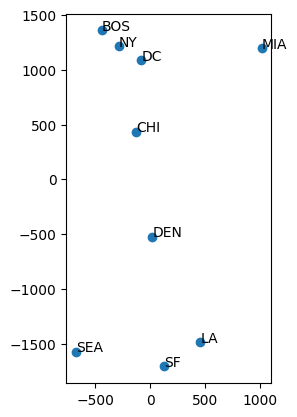

In [ ]:
plt.scatter(coordinates[:,0], coordinates[:,1])
plt.axis('scaled')
for i, txt in enumerate(df.columns):
    plt.annotate(txt, (coordinates[i,0],coordinates[i,1]))

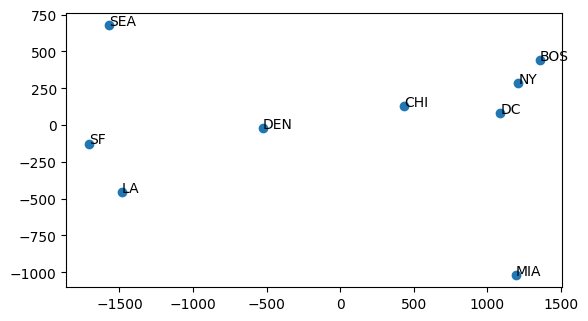

In [ ]:
plt.scatter(coordinates[:,1], -coordinates[:,0])
plt.axis('scaled')
for i, txt in enumerate(df.columns):
    plt.annotate(txt, (coordinates[i,1],-coordinates[i,0]))